In [1]:
weeks = [f"Week {n}" for n in range(1,55)]
from GSHEETS import *
import xlsxwriter
import numpy as np

#dataset = pd.ExcelWriter("Output/CreditData.xlsx",engine = "xlsxwriter")
cred  = "credentials.json"
wks = authenticate(cred)
client = authenticater(cred)
key_cs = "1gV25QiySiqVtv5Q1_tzgy0TiKS3_-ZGGEeUVEiG3g0I"

countries_consol = {
    "Kenya":["1_lDRhN_g9PJRG9YQhAn7fSC6XzSrajRVXWlPytYb8og",0.0080],
    "Nigeria":["1Nxkpt7cxTHSm7LHDzWUTSoYInT3YQFwIMRr5phVN4os",0.0022],
    "Ethiopia": ["1f3Pe_K4IDMgCYExNAp9KiLSZvTsWKCbqatpI1tesWAA",0.019],
    "Colombia":["13TOtUzGhRCOIqS4yBgJw9u08k2OmpNaUgeeERIM7zXc",0.00021],
    "Indonesia":["1-LsSYSgo4mDVrrpUfVRIfUhl6Afoce8LphKCgPY65h0",0.000066],
   "Fiji":["1j3jXTqteSn3uF1BUMI4Rq5-w9ZNY-dcR--B5uBfuCn8",0.4485]
    }
countries_weekly = {
    "Kenya":["1R_BRst1ok7bav9UKgTWyz28Kk60gCVyy5TuPLO0pn0U",0.0083],
    "Nigeria":["1udGFOaTk3cKk2Xoc1onsui45COIPt2rNCDkZEzxCZW4",0.0022],
    "Ethiopia": ["1xW54KK70LjuetIr0-2z9cvxDqZw40G5JyEm6_uWRqyM",0.019],
    "Colombia":["1iM_EHdzv4xr-cfZXgVY8oEfUd7BSUVuxgjbvF25rBbY",0.00021],
    "Indonesia":["1IXFi9IxwVNzOlf2B1JFrymf6IFofwMUvogkE5cuXNrs",0.000066],
    "Fiji": ["1Y1GQMJMgOSANo2uD3J8nbq_oJiTxwxOcl0CrzCbTIgQ",0.4485]
    }

Surveys={
    "Kenya": "1Ifuoh77Dqqvzm6KJ-AtMSFCDYWXAFz-jheCMyFZQ0T8",
    "Nigeria":"1-IeLC87XXI34whlAIaRM0S7EiGDG6RQhqpMFtr6XuqA",
    "Indonesia":"1otMrboci0ZqAQiFe57DQ9tuLDIwYVNfuz_8YaXTzZRs",
    "Ethiopia":"1cUREwZjTEqeC2WiaxgLZPLgiwUo-rDA_UPdtfp-8iL0",
    "Colombia":"1t7mMXZ2CXoNqXSErsjFYesX5aqBRw_FFui80BBQ2wJo",
    "Fiji":"1H6c0S86qfDnXeharksuRthbtAi-PEz4E8ANHzIfPAFA"
    }
init()



In [3]:
# extract and combine all the consolidated datasets
key = countries_weekly["Kenya"][0]
data_acc = reader("Income sources",wks,key)
data_trans= reader("Income reports",wks,key)

The read data:Income sources has shape ----------->(210, 29)
The read data:Income reports has shape ----------->(33993, 71)


In [3]:
data_acc.to_excel('Outputs/accounts.xlsx')
data_trans.to_excel('Outputs/trans.xlsx')

In [5]:
data_acc.columns
x= data_acc[['firm_id','Income source name', 'Income source type','Income source sub-type']]
x.columns =['firm_id','name','type','subtype']
x.head(2)

,firm_id,name,type,subtype
0,NA-OT-N3-1489,Income Source 1,Business,F - Garments production LM
1,NA-OT-N3-1487,Income Source 1,Business,AT - Wholesale selling


In [6]:
data_trans.columns
y= data_trans[['firm_id','Income report income source name', 'Income report amount']]
y.columns =['firm_id','name','amount']
y.head(3)

,firm_id,name,amount
0,NA-OT-N3-1489,Income Source 1,20000.0
1,NA-OT-N3-1489,Income Source 1,23500.0
2,NA-OT-N3-1489,Income Source 1,33200.0


In [32]:
y1 = y.merge(x,on = ["firm_id","name"])
y2 = y1.groupby(['firm_id','type'])['amount'].agg('sum').reset_index()
y2.head()

,firm_id,type,amount
0,KS-KB-K3-1052,Business,4918170.0
1,KS-KB-K3-1095,Business,12670.0
2,KS-KB-K3-1133,Business,205820.0
3,KS-KB-K3-1226,Business,485930.0
4,KS-KB-K3-1352,Agriculture,10500.0


In [33]:
import networkx as nx
import matplotlib.pyplot as plt
graph = nx.Graph()

NodeView(('KS-KB-K3-1052', 'KS-KB-K3-1095', 'KS-KB-K3-1133', 'KS-KB-K3-1226', 'KS-KB-K3-1352', 'Business', 'Agriculture', 'KS-KL-K2-1349', 'KS-KN-K3-1033', 'KS-KN-K3-1064', 'KS-KN-K3-1080', 'KS-KN-K3-1215', 'KS-KN-K3-1333', 'KS-KN-K3-2016', 'KS-KN-K3-2187', 'KS-KN-K3-2201', 'KS-KN-K3-2206', 'KS-KS-K1-2406', 'KS-KS-K1-2407', 'KS-KS-K1-4001', 'KS-KS-K2-4029', 'KS-KS-K3-2633', 'KS-KS-K3-2636', 'KS-KS-K3-2637', 'KS-KS-NC-8221', 'KS-KU-K1-2298', 'KS-KU-K1-2299', 'KS-KU-K2-1256', 'KS-KU-K2-1259', 'KS-KU-K2-1360', 'KS-KU-K2-1437', 'KS-KU-K2-4032', 'KS-KU-K2-4034', 'KS-LU-K2-1161', 'KS-MG-CT-1493', 'KS-MG-NC-1492', 'KS-MM-K1-1195', 'KS-MM-K1-1277', 'KS-MM-K1-1285', 'KS-MM-K1-2293', 'KS-MM-K1-4005', 'KS-MM-K2-4028', 'KS-MM-K2-4035', 'KS-MY-K1-1638', 'KS-MY-K1-1665', 'KS-MY-K1-2155', 'KS-MY-K1-2399', 'KS-MY-K1-4002', 'KS-MY-K1-4007', 'KS-MY-NC-1491', 'KS-MY-NC-1599', 'KS-NY-K2-1531', 'KS-NY-K2-1560', 'KS-OJ-K1-4008', 'KW-GS-W3-1430', 'KW-GS-W3-1447', 'KW-KI-W1-2114', 'KW-KI-W1-2126', 'KW-KI-W2-2

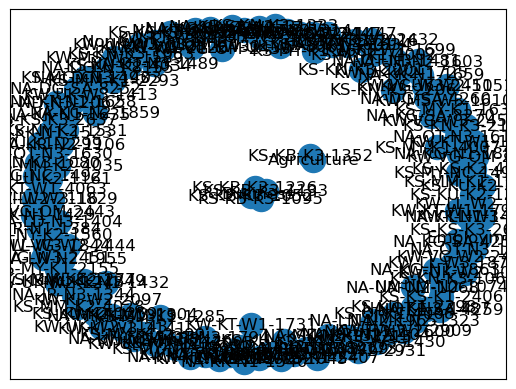

In [36]:
dy = list(y2["firm_id"])+list(y2['type'])
graph.add_nodes_from(dy)
nx.draw_networkx(graph)
graph.nodes()

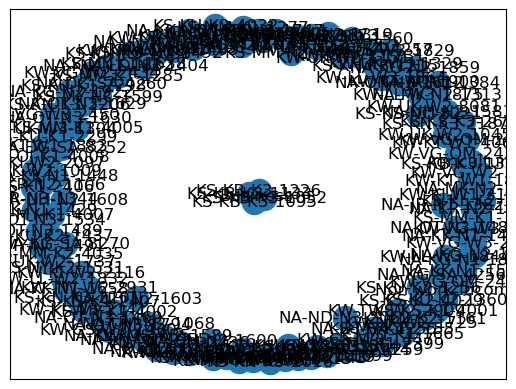

In [37]:
x1 = []
for i,j in zip(y2['firm_id'][:5],y2["type"][:5]):
    x1.append((i,j))
graph.add_edges_from(x1)
nx.draw_networkx(graph)

In [ ]:
nx.write_graphml(graph,"consolidated.graphml")